<a href="https://colab.research.google.com/github/Nmuka/Github_pages/blob/main/train_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import pandas as pd
data_total = pd.read_csv('Key_Kap3.csv')
# data = pd.read_csv('/content/sample_data/california_housing_test.csv')
# data_total = data_total[(data_total['Period'] < 5) & (data_total['Avg Drift (max)'] < 0.1)]

In [15]:
data_total

,Maks No,Long,Lat,Yapim Yılı,Zemin,Ss,S1,Fc,Etriye Aralık,Boyuna Donati Oranı,...,Perde Alanı,Period,Period 2,Period 3,Drift (max),Avg Drift (max),Ve/Vr (score),Ve/Vr Limit(score),Score,Tip
0,283808848,27.202795,38.429835,1984,4,1.10,0.27,5.0,0.2,1,...,0.0,1.12,0.84,0.81,0.02280,0.02200,1.0,0.206,0.794,Ticari
1,283808848,27.202795,38.429835,1984,4,1.10,0.27,10.0,0.2,1,...,0.0,0.94,0.71,0.68,0.01912,0.01840,1.0,0.310,0.690,Ticari
2,283808848,27.202795,38.429835,1984,4,1.10,0.27,20.0,0.2,1,...,0.0,0.79,0.59,0.57,0.01611,0.01550,1.0,0.350,0.650,Ticari
3,283808848,27.202795,38.429835,1984,4,1.10,0.27,30.0,0.2,1,...,0.0,0.71,0.54,0.52,0.01457,0.01402,1.0,0.350,0.650,Ticari
4,283808848,27.202795,38.429835,1984,4,1.10,0.27,40.0,0.2,1,...,0.0,0.66,0.50,0.48,0.01357,0.01305,1.0,0.350,0.650,Ticari
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45977,294640594,27.212741,38.476899,2006,2,1.08,0.27,5.0,0.1,1,...,0.0,1.58,1.36,1.07,0.01113,0.00944,0.0,0.094,-0.094,Konut
45978,294640594,27.212741,38.476899,2006,2,1.08,0.27,10.0,0.1,1,...,0.0,1.33,1.15,0.90,0.00934,0.00789,0.0,0.254,-0.254,Konut
45979,294640594,27.212741,38.476899,2006,2,1.08,0.27,20.0,0.1,1,...,0.0,1.12,0.96,0.76,0.00784,0.00660,0.0,0.334,-0.334,Konut
45980,294640594,27.212741,38.476899,2006,2,1.08,0.27,30.0,0.1,1,...,0.0,1.01,0.87,0.68,0.00708,0.00594,0.0,0.350,-0.350,Konut


In [ ]:
data_total = data_total[(data_total['Period'] < 5) & (data_total['Avg Drift (max)'] < 0.1)]


In [16]:
# train_model.py

import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import numpy as np
import pandas as pd
import joblib
import sys

# Save the original stdout for later
original_stdout = sys.stdout

# Open a log file to save the output
with open('train_model_log.txt', 'w') as log_file:
    # Redirect stdout to the log file
    sys.stdout = log_file
    output_index = 28
    # Create a DataFrame
    no_samples = data_total.shape[0]
    data = data_total[data_total.columns[[4, 6, 7, 8, 10, 11, 12, 13, 14, 15, 16, 19, 20, 21, 22, 23, output_index]]]
    # data = data_total[data_total.columns[[7, 8, 10, 12, 13, 14, 15, 16, 19, 20, 21, output_index]]]

    # Define features and target variable
    # X = data.drop("Period", axis=1)
    # y = data["Period"]
    X = data.drop(data_total.columns[[output_index]], axis=1)
    y = data[data_total.columns[[output_index]]]
    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Identify numeric and categorical features
    numeric_features = X.select_dtypes(include=['float64', 'int64']).columns
    categorical_features = X.select_dtypes(include=['object']).columns

    # Preprocessing pipeline
    numeric_transformer = Pipeline(steps=[
        ('scaler', MinMaxScaler())
    ])

    categorical_transformer = Pipeline(steps=[
        ('onehot', OneHotEncoder())
    ])

    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numeric_transformer, numeric_features),
            ('cat', categorical_transformer, categorical_features)
        ])

    # Define the model
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
        tf.keras.layers.Dense(32, activation='relu'),
        # tf.keras.layers.Dense(16, activation='tanh'),  # Additional hidden layer
        # tf.keras.layers.Dense(8, activation='tanh'),   # Additional hidden layer
        tf.keras.layers.Dense(1)  # Output layer for regression
    ])

    # Compile the model
    model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae', 'acc'])

    # Fit the preprocessing pipeline
    X_train_preprocessed = preprocessor.fit_transform(X_train)
    X_test_preprocessed = preprocessor.transform(X_test)

    # Fit the model
    history = model.fit(X_train_preprocessed, y_train, epochs=100, batch_size=250, validation_split=0.2)

    # Save the trained model
    model.save("trained_model.h5")
    joblib.dump(preprocessor, "preprocessor.joblib")
    joblib.dump(data, "data.joblib")

    # Print the training history and model summary
    print("\nTraining History:")
    print(history.history)

    print("\nModel Summary:")
    model.summary()

# Restore the original stdout
sys.stdout = original_stdout


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import numpy as np
import pandas as pd
import joblib
import sys

# Save the original stdout for later
original_stdout = sys.stdout

# Open a log file to save the output
with open('train_model_log.txt', 'w') as log_file:
    # Redirect stdout to the log file
    sys.stdout = log_file
    output_index = 28
    # Create a DataFrame
    no_samples = data_total.shape[0]
    data = data_total[data_total.columns[[4, 6, 7, 8, 10, 11, 12, 13, 14, 15, 16, 19, 20, 21, 22, 23, output_index]]]

    # Define features and target variable
    X = data.drop(data_total.columns[[output_index]], axis=1)
    y = data[data_total.columns[[output_index]]]
    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Identify numeric and categorical features
    numeric_features = X.select_dtypes(include=['float64', 'int64']).columns
    categorical_features = X.select_dtypes(include=['object']).columns

    # Preprocessing pipeline
    numeric_transformer = Pipeline(steps=[
        ('scaler', MinMaxScaler())
    ])

    categorical_transformer = Pipeline(steps=[
        ('onehot', OneHotEncoder())
    ])

    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numeric_transformer, numeric_features),
            ('cat', categorical_transformer, categorical_features)
        ])

    # Define the model
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.Dense(1)
    ])

    # Compile the model with a lower learning rate
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                  loss='mean_squared_error',
                  metrics=['mae', 'mse'])

    # Fit the preprocessing pipeline
    X_train_preprocessed = preprocessor.fit_transform(X_train)
    X_test_preprocessed = preprocessor.transform(X_test)

    # Fit the model with early stopping
    early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

    history = model.fit(X_train_preprocessed, y_train,
                        epochs=100,
                        batch_size=128,
                        validation_split=0.2,
                        callbacks=[early_stopping])

    # Save the trained model
    model.save("trained_model.h5")
    joblib.dump(preprocessor, "preprocessor.joblib")
    joblib.dump(data, "data.joblib")

    # Evaluate the model on the test set
    eval_results = model.evaluate(X_test_preprocessed, y_test)
    print("\nEvaluation Results:")
    print("Mean Squared Error:", eval_results[0])
    print("Mean Absolute Error:", eval_results[1])

    # Print the training history and model summary
    print("\nTraining History:")
    print(history.history)

    print("\nModel Summary:")
    model.summary()

# Restore the original stdout
sys.stdout = original_stdout


c:\Users\mukan\anaconda3\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
score = model.evaluate(X, y_test, verbose=1)
score

288/288 [==============================] - 0s 1ms/step
Predicted Pe values:
[[ 0.08724563]
 [-0.11764425]
 [ 0.53806436]
 ...
 [ 0.4870407 ]
 [ 0.66084695]
 [ 0.70940626]]


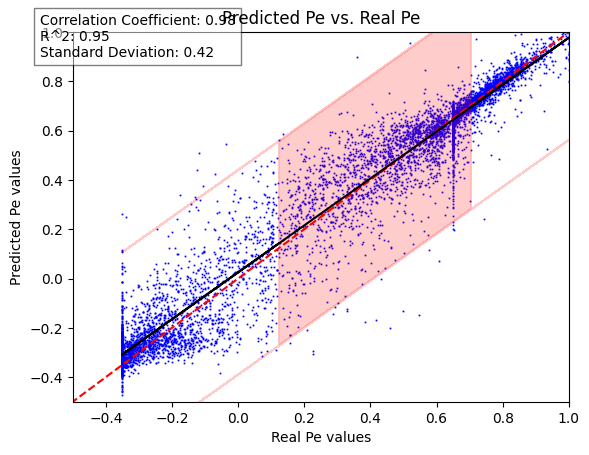

In [19]:
# predict.py

import tensorflow as tf
import pandas as pd
import joblib
import matplotlib.pyplot as plt
from scipy.stats import linregress, norm

# Load the trained model
loaded_model = tf.keras.models.load_model("trained_model.h5")

# Load the preprocessor
preprocessor = joblib.load("preprocessor.joblib")

# Load the read data
data = joblib.load("data.joblib")
output_index = 28
# y_test = data[data_total.columns[[output_index]]]
# Preprocess the new data
# new_data_preprocessed = preprocessor.transform(data.drop(data_total.columns[[output_index]], axis=1))
new_data_preprocessed = preprocessor.transform(X_test)

# Make predictions using the loaded model
predictions = loaded_model.predict(new_data_preprocessed)

print("Predicted Pe values:")
print(predictions)

x = np.array(y_test).flatten()
y = predictions.flatten()

# Calculate regression line
slope, intercept, r_value, p_value, std_err = linregress(x, y)
regression_line = slope * x + intercept

# Calculate correlation coefficient and R^2
correlation_coefficient = np.corrcoef(x, y)[0, 1]
r_squared = r_value**2

# Calculate standard deviation
std_deviation = np.std(y)

# Plotting predicted vs. real Pe
plt.scatter(y_test, predictions, 0.2, color='blue', marker='x')
# plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red')
plt.plot([-10, 10], [-10, 10], linestyle='--', color='red')
plt.plot(x, regression_line, color='black', label='Regression Line')
# Desired confidence level
confidence_level = 0.99

# Calculate the critical value
critical_value = norm.ppf((1 + confidence_level) / 2)
critical_value = 1
# Calculate confidence intervals for the regression line
confidence_interval = critical_value * std_deviation  # 95% confidence interval
# Plot confidence intervals
plt.fill_between(x, regression_line - confidence_interval, regression_line + confidence_interval, color='red', alpha=0.2, label='95% Confidence Interval')


# Add statistics to the plot
plt.text(-0.6, 0.9, f'Correlation Coefficient: {correlation_coefficient:.2f}\nR^2: {r_squared:.2f}\nStandard Deviation: {std_deviation:.2f}', bbox=dict(facecolor='white', alpha=0.5))
plt.xlabel('Real Pe values')

plt.ylabel('Predicted Pe values')
plt.title('Predicted Pe vs. Real Pe')

plt.xlim(-0.5, 1)
plt.ylim(-0.5, 1)

plt.show()

In [ ]:
slope



0.9745943905438283

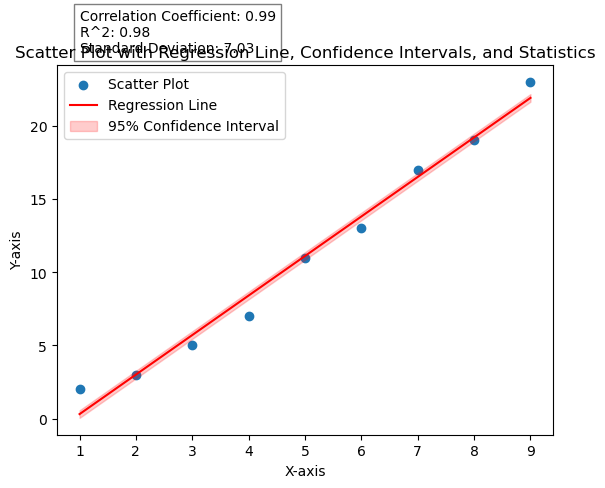

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Generate example data
x = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9])
y = np.array([2, 3, 5, 7, 11, 13, 17, 19, 23])

# Calculate regression line
slope, intercept, r_value, p_value, std_err = linregress(x, y)
regression_line = slope * x + intercept

# Calculate confidence intervals for the regression line
confidence_interval = 1.96 * std_err  # 95% confidence interval

# Calculate correlation coefficient and R^2
correlation_coefficient = np.corrcoef(x, y)[0, 1]
r_squared = r_value**2

# Calculate standard deviation
std_deviation = np.std(y)

# Plot the scatter plot, regression line, and confidence intervals
plt.scatter(x, y, label='Scatter Plot')
plt.plot(x, regression_line, color='red', label='Regression Line')

# Plot confidence intervals
plt.fill_between(x, regression_line - confidence_interval, regression_line + confidence_interval, color='red', alpha=0.2, label='95% Confidence Interval')

# Add statistics to the plot
plt.text(1, 25, f'Correlation Coefficient: {correlation_coefficient:.2f}\nR^2: {r_squared:.2f}\nStandard Deviation: {std_deviation:.2f}', bbox=dict(facecolor='white', alpha=0.5))

# Set labels and title
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Scatter Plot with Regression Line, Confidence Intervals, and Statistics')

# Show legend
plt.legend()

# Show the plot
plt.show()
